# Artifical Neural Networks

## Concepts

### Activation Functions

- Step Function
- Sigmoid Function
- Softmax Function
- Hyperbolic Tangent Function (Tanh)
- Rectified Linear Unit (ReLU): Can be used to deal with **Vanishing gradients**

### Loss Functions
- Quadratic Cost
- Cross Entropy
- Binary Cross Entropy
- Categorical Cross Entropy
- Sparse Categroical Cross Entropy

### Optimizers
- Gradient Descent
- Stochastic Gradient Descent
- Adam: Adaptive Gradient Descent

## Keras Syntax

### Preprocessing

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns

In [3]:
df = pd.read_csv("../DATA/fake_reg.csv")
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


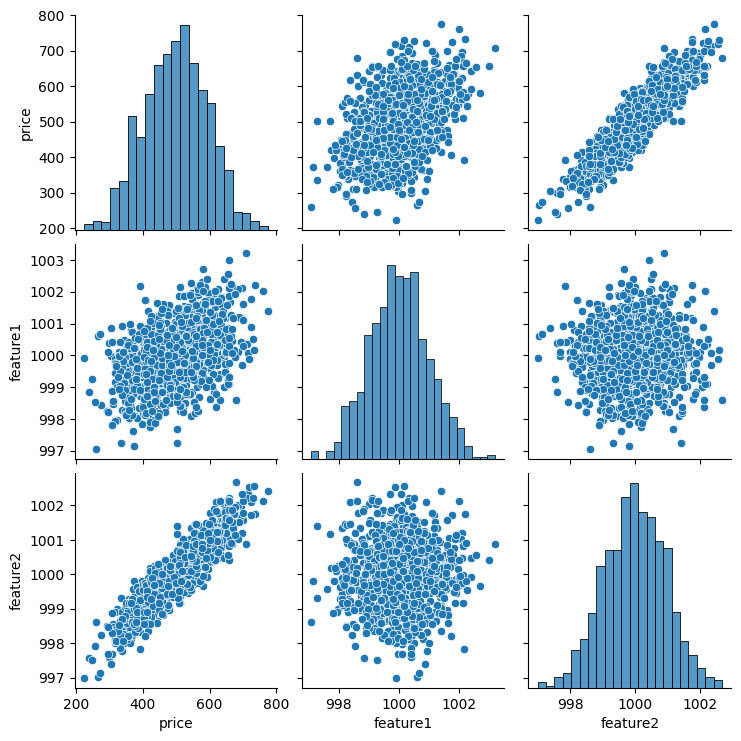

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [6]:
# Separating features and labels
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [7]:
# Train Test Split of Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Scaling Data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model Building

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
# Method 1
model = Sequential([
        Dense(4, activation="relu"), 
        Dense(2, activation="relu"), 
        Dense(1)]
    )

In [21]:
# Method 2

model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

In [22]:
model.compile(optimizer='rmsprop', loss='mse')

In [23]:
model.fit(x=X_train, y=y_train, epochs=250)

Epoch 1/250


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 255250.9844
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 260008.5625
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 256142.6250
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 263852.5000
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 257680.5625
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 250887.9688
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 254016.0000
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 260936.1094
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 256882.3438
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 252893.3281
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 251785.6250
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 252760.2656
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 255630.3594
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - los

<Axes: >

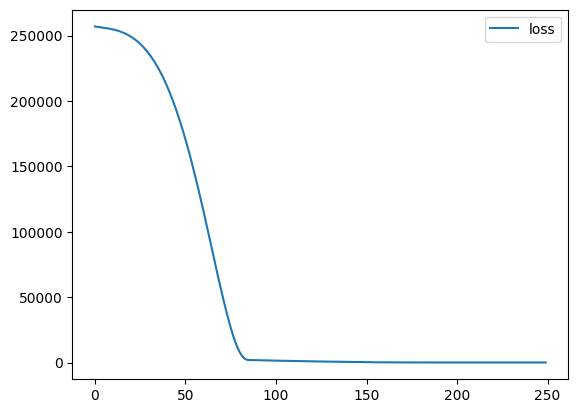

In [24]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Prediction & Evaluation

In [26]:
eval_loss = model.evaluate(X_test, y_test, verbose=0)
eval_loss

24.903295516967773

In [30]:
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(300,))

pred_df = pd.DataFrame(y_test, columns=["True Y"])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ["True Y", "Predicted Y"]

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step


<Axes: xlabel='True Y', ylabel='Predicted Y'>

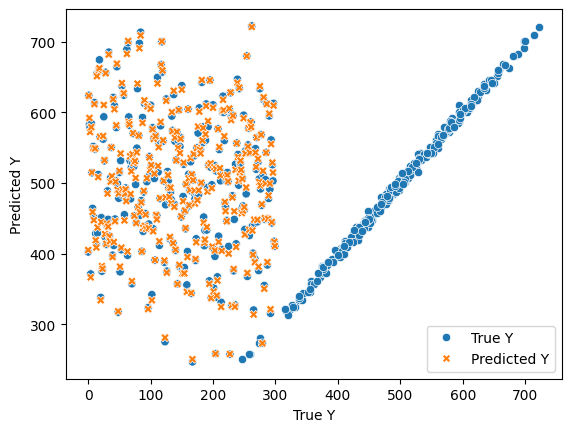

In [35]:
sns.scatterplot(x="True Y", y="Predicted Y", data=pred_df)
sns.scatterplot(pred_df)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [40]:
mean_absolute_error(pred_df['True Y'], pred_df['Predicted Y'])
# mean_squared_error(pred_df['True Y'], pred_df['Predicted Y'])

3.9965546565056926

In [41]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [42]:
# Making new predictions

new_gem = [[998, 1000]]
new_gem = scaler.transform(new_gem)
model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[419.5209]], dtype=float32)

### Save model

In [43]:
from tensorflow.keras.models import load_model

In [46]:
model.save("models/gem_ann_model.keras")

In [47]:
loaded_model = load_model("models/gem_ann_model.keras")
loaded_model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[419.5209]], dtype=float32)